# Оптимизация с помощью `scipy.optimize`

**Двумерные функции**


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Целевые-функции" data-toc-modified-id="Целевые-функции-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Целевые функции</a></span><ul class="toc-item"><li><span><a href="#Квадратичная-функция" data-toc-modified-id="Квадратичная-функция-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Квадратичная функция</a></span></li><li><span><a href="#Функция-Розенброка" data-toc-modified-id="Функция-Розенброка-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Функция Розенброка</a></span></li><li><span><a href="#Функция-Джонса" data-toc-modified-id="Функция-Джонса-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Функция Джонса</a></span></li></ul></li><li><span><a href="#Безуслованая-оптимизация" data-toc-modified-id="Безуслованая-оптимизация-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Безуслованая оптимизация</a></span><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Постановка задачи</a></span></li></ul></li><li><span><a href="#Услованая-оптимизация" data-toc-modified-id="Услованая-оптимизация-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Услованая оптимизация</a></span><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Постановка задачи</a></span></li></ul></li><li><span><a href="#Задание" data-toc-modified-id="Задание-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Задание</a></span></li></ul></div>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

import scipy as sp
from scipy.optimize import minimize

In [2]:
# Styles
import matplotlib as mpl
mpl.rcParams['font.size'] = 12
cm = plt.cm.tab10  # Colormap

# import seaborn
# seaborn.set_style('whitegrid')

In [3]:
# %config InlineBackend.figure_formats = ['pdf']
# %config Completer.use_jedi = False

---

## Целевые функции

Подключаем библиотеки, создаём вспомогательные функции.

In [4]:
from copy import deepcopy
def counted(f):
    def wrapped(*args, **kwargs):
        wrapped.calls += 1
        wrapped.Xk.append(deepcopy(*args))
#         print(wrapped.calls, *args)
        return f(*args, **kwargs)
    wrapped.calls = 0
    wrapped.Xk = []
    return wrapped

# auxiliary function to save intermediate points
def store(xk):
    Xk.append(xk)

### Квадратичная функция

$$ f(x_1, x_2) = x_1^2 + x_2^2 - \beta x_1 x_2, \quad \beta \in [0, 2) $$

Функция представляет собой наклонённую двумерную квадратичную функцию.
Сечения $z = const$ являются эллипсами.
Параметр $\beta$ отвечает за наклон и вытянутость эллипсов.
Если $\beta = 0$, то эллиптические контуры становятся круговыми.
При $\beta = 2$ эллипсы вырождаются в прямые, а линия $y = x$ является слабым минимумом.

In [5]:
@counted
def SQF(x):
    '''Slanted quadratic function, beta=[0,2)'''
    beta = 1.5
    return sum(x[:]**2) - beta*x[0]*x[1]
SQF.__name__ = 'SQF'

### Функция Розенброка

$$ f(x_1, x_2) = 100(x_2 - x_1^2)^2 + (1-x_1)^2 $$

Функция имеет единственный минимум, находящийся внутри узкой параболической долины в точке $x = (1, 1)$ и равный $0$.

Существует многомерное обобщение функции Розенброка:
$$
  f(\mathbf{x}) = \sum\limits_{i=1}^{N-1} \left[ 100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2 \right].
$$

Глобальный минимум многомерной функции Розенброка также находится в точке $x_i = 1$ и тоже равен $0$.

Считается, что поиск глобального минимума данной функции является нетривиальной задачей, поэтому она часто используются для тестирования оптимизационных алгоритмов.

In [6]:
# definition of objective function and constraints
@counted
def rosen(x):
    '''Rosenbrock function'''
    # 2D: f = 100*(x2 - x1**2)**2 + (1 - x1)**2
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)
rosen.__name__ = 'rosen'

### Функция Джонса

$$ f(x_1, x_2) = x_1^4 + x_2^4 - 4x_1^3 - 3x_2^2 + 2x_1^2 + 2x_1x_2 $$

Гладкая мультимодальная функция четвёртого порядка, хорошо подходящая для тестирования глобальных алгоритмов и метода мультистарт.

Глобальный минимум:\
$x = (2.6732, -0.6759)$, $f(x) = -13.5320$\
Локальные минимумы:\
$x = (-0.4495, 2.2928)$, $f(x) = -9.7770$\
$x = ( 2.4239, 1.9219)$, $f(x) = -9.0312$

In [7]:
# definition of objective function and constraints
@counted
def jones(x):
    '''Jones function'''
    return x[0]**4 + x[1]**4 - 4*x[0]**3 - 3*x[1]**3 + 2*x[0]**2 + 2*x[0]*x[1]
jones.__name__ = 'jones'

In [8]:
def set_constants(obj_fun):
    '''Set bounds and optimum point'''
    
    if obj_fun == SQF:
        X_LIM = [-10., 10.]
        F_LIM = [0, obj_fun(np.array([X_LIM[0], X_LIM[1]]))]
        X_OPT = [0., 0.]
    
    elif obj_fun == rosen:
        X_LIM = [-1.2, 1.2]
        F_LIM = [0, 680]
        X_OPT = [1., 1.]

    elif obj_fun == jones:
        X_LIM = [-1.5, 3.5]
        F_LIM = [-15, 40]
        X_OPT = [2.6732, -0.6759]

    X_LIM = np.array(X_LIM)
    F_LIM = np.array(F_LIM)
    X_OPT = np.array(X_OPT)
    
    return X_LIM, F_LIM, X_OPT

---

## Безуслованая оптимизация

### Постановка задачи

Выбор задачи и установка констант

In [9]:
obj_funs = {'SQF':SQF, 'rosen':rosen, 'jones':jones} # choose a function

obj_fun = obj_funs['rosen']
X_LIM, F_LIM, X_OPT = set_constants(obj_fun)
F_OPT = obj_fun(X_OPT)

print(f'obj_fun = {obj_fun.__name__}')
print(f'X_OPT = {X_OPT}, F_OPT = {F_OPT:.3f}')

obj_fun = rosen
X_OPT = [1. 1.], F_OPT = 0.000


Отрисовка графиков выбранной целевой функции

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


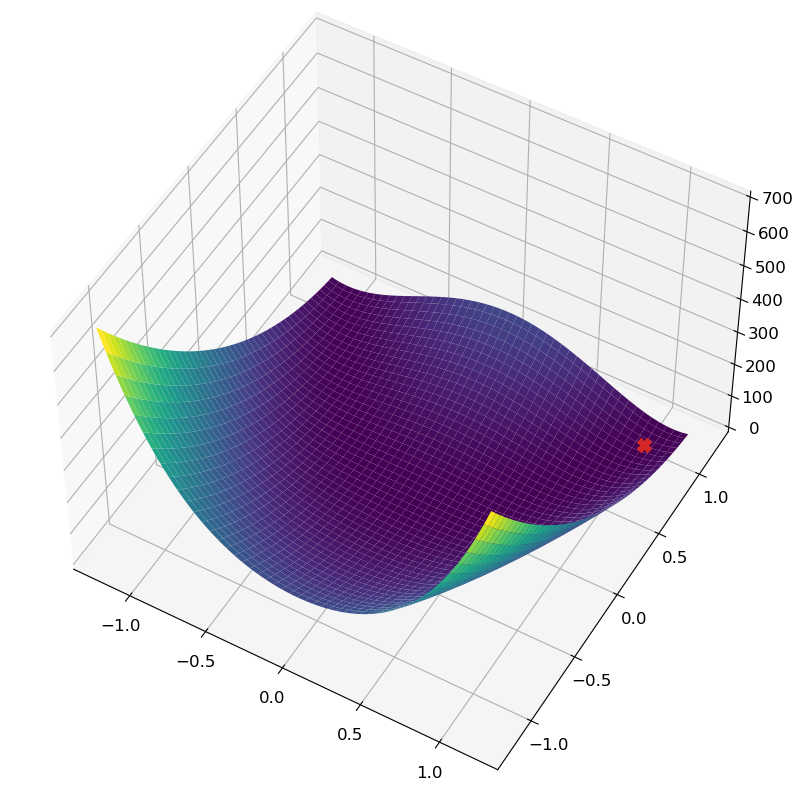

In [10]:
X = np.arange(*X_LIM, 0.01)
Y = np.arange(*X_LIM, 0.01)
X, Y = np.meshgrid(X, Y)
Z = obj_fun(np.array([X,Y]))

# 3d axis
fig = plt.figure(figsize=[15, 10])
ax = fig.gca(projection='3d')

# set angle
ax.view_init(50, -60)

# surface
ax.plot_surface(X, Y, Z, cmap=mpl.cm.viridis)
ax.plot(*X_OPT, F_OPT, 'X', c=cm(3), ms=10, zorder=3)
plt.show()

In [11]:
# functions for visualization
def fun_2d(X1, X2, fun):
    array_2d = np.zeros((len(X1), len(X2)))
    for i, x2 in enumerate(X2):
        for j, x1 in enumerate(X1):
            array_2d[i, j] = fun(np.array([x1, x2]))
    return array_2d

In [12]:
def fun_contours(fun, points=[], constr=None, trajectory=[], figname=''):
    '''Draw function 2D contours'''
    plt.figure(figsize=(7, 7))
    X1 = X2 = np.linspace(*X_LIM, 401)

    # function contours
    z_lines = np.linspace(0, F_LIM[1]**0.5, 20)**2
    if (F_LIM[0] < 0):
        z_lines_1 = np.linspace(F_LIM[0], 0, 20)
        z_lines = np.concatenate((z_lines_1[:-1], z_lines))
    
    contours = plt.contour(X1, X2, fun_2d(X1,X2,fun), z_lines,
                           linewidths=1., colors='k', alpha=0.9)
    plt.clabel(contours, fontsize=8, fmt='%.0f')

    # points
    for point in points:
        plt.plot(*point, 'x', c=cm(3), mew=2., ms=15)
    
    # trajectory
    if (len(trajectory) != 0):
        plt.plot(*trajectory[:,0],   'o', c=cm(0), ms=8)
        plt.plot(*trajectory,       '-o', c=cm(0), ms=3.5)
        plt.plot(*trajectory[:,-1],  '+', c=cm(0), mew=2., ms=15)
    
    # constraint
    if constr:
        plt.contour(X1,X2,fun_2d(X1,X2,constr),0,linewidths=1.,colors=cm(1))

    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation='horizontal', horizontalalignment='center')
    plt.xlim(*X_LIM)
    plt.ylim(*X_LIM)
    plt.tight_layout()
    plt.show()
    if (figname):
        plt.savefig(figname, dpi=200, bbox_inches='tight')

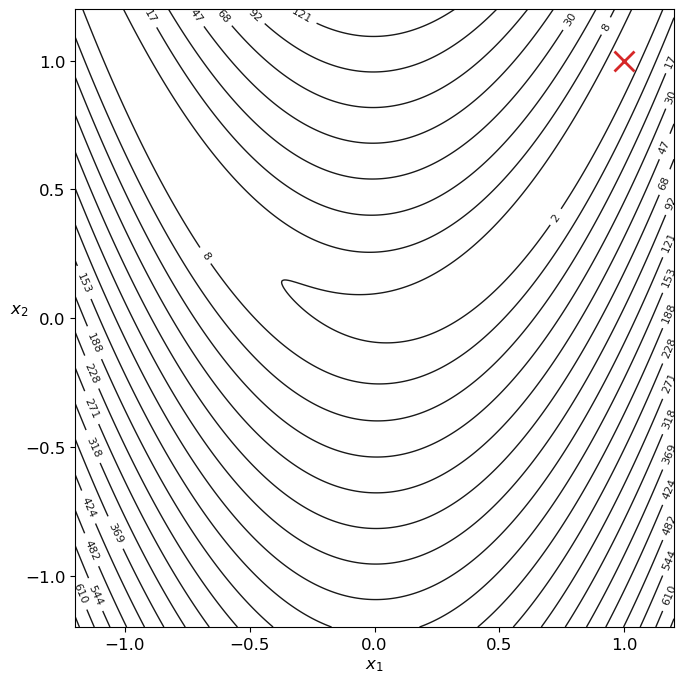

In [13]:
fun_contours(obj_fun, points=[X_OPT])

---

## Услованая оптимизация ##

### Постановка задачи ###

Добавим в задачу нелинейное ограничение:

$$ c(\mathbf{x}) = \sum\limits_{i=1}^{N} x_i^2. $$

Решение будем искать внутри кольца:
$$
\begin{aligned}
    & \min_{x} f(x) \\
    & 0.8 \le c(x) \le 1. \\
\end{aligned}
$$

In [14]:
# definition of constraints
def ring(x, center, radius, width):
    '''Ring with center [center], radius [radius] and width [width]'''
    r = sum((x - center)**2)**0.5
    return (r - (radius-0.5*width))**2 - (0.5*width)**2

Выбор задачи и установка констант

In [15]:
# define objective function
obj_fun = obj_funs['rosen']
X_LIM, F_LIM, X_OPT = set_constants(obj_fun)
F_OPT = obj_fun(X_OPT)

print(f'obj_fun = {obj_fun.__name__}')
print(f'X_OPT = {X_OPT}, F_OPT = {F_OPT:.3f}')

obj_fun = rosen
X_OPT = [1. 1.], F_OPT = 0.000


In [16]:
# define ring
Center = np.array([0, 0])
radius, width = 1., 0.2
constr = lambda x: ring(x, Center, radius, width)
print(f'radius = {radius:.5}, width = {width:.5}')

radius = 1.0, width = 0.2


Отрисовка графиков выбранной целевой функции

In [17]:
alpha_rad = np.linspace(0, 2*np.pi, int(1e6))
alpha_deg = np.degrees(alpha_rad)
f1 = obj_fun(radius * np.array([np.cos(alpha_rad), np.sin(alpha_rad)]))

idx_min = np.argmin(f1)
alpha_opt = alpha_deg[idx_min]

X_OPT = radius*np.array([np.cos(np.radians(alpha_opt)), np.sin(np.radians(alpha_opt))])
F_OBJ = obj_fun(X_OPT)
print(f'X_OPT = {X_OPT}, f_obj = {F_OBJ:.3}, c = {constr(X_OPT):.3}\n')

X_OPT = [0.78641611 0.61769709], f_obj = 0.0457, c = -6.94e-18



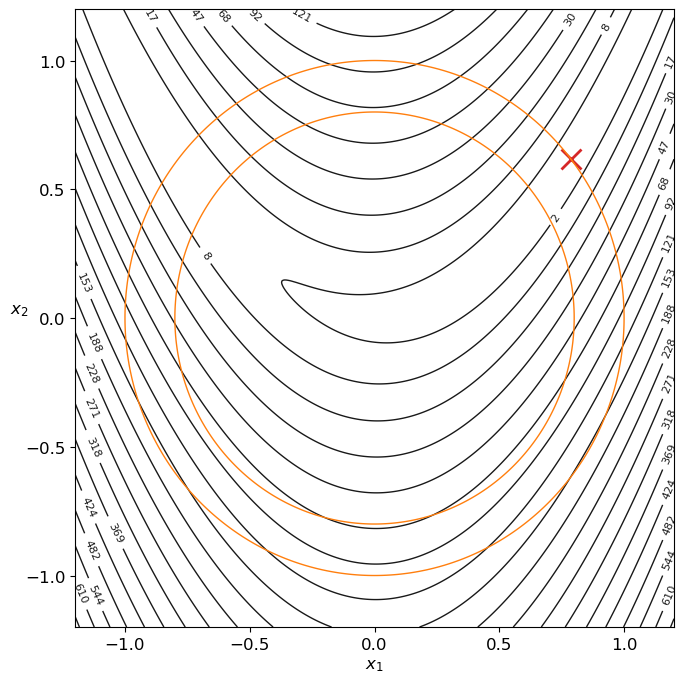

In [18]:
fun_contours(obj_fun, points=[X_OPT], constr=constr)

---

## Задание

Провести сравнительное тестирование двух предложенных алгоритмов и оформить отчёт в виде файла `.ipynb`.

Рассмотреть следующие задачи:

1. Квадратичная функция. Эта функция дана для тренировки, в зачет не идет, в отчете может не содержаться.
1. Функция Розенброка, безусловная оптимизация. Сравнить алгоритмы по количеству вызовов целевой функции.
1. Функция Розенброка, условная оптимизация. Исследовать способность алгоритмов находить условный минимум, предложить способ решения проблемы локальных минимумов. Для алгоритмов, не поддерживающих работу с нелинейными ограничениями, использовать метод штрафов.
1. (Опционально) Функция Джонса или решение задачи с пружинками (TBD).